# Exploring Other Visuals

This notebook demonstrates other visuals you can make with Seaborn. There are much more out there, but I wish to start you off on some interesting ones. But first, let's import the libraries and load the dataset. 

Run the code below, then proceed to the CHALLENGE.

In [1]:
import pandas as pd
import seaborn as sns

tips = pd.read_csv("tips.csv")

---
### CHALLENGE
In the code cell below, type the command that will display a table with all the attributes, the first 5 rows, and the last 5 rows of the dataframe? 

---

In [25]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


---
# Adding More Dimensions with pairplot( ) and FacetGrid( )
A lot of data scientists start data exploration using pairplot(). The pairplot() function accepts all sorts of parameters, but the fastest way to start is to try passing it the whole dataframe. In the code below, that's exactly what we do with our `tips` dataframe. 

Run the code and see the results.  


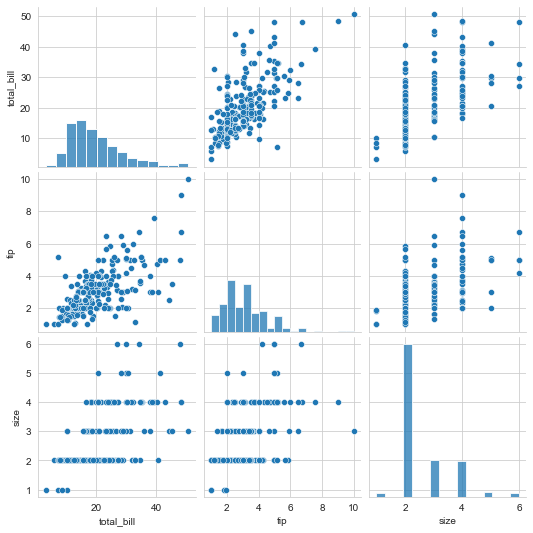

In [72]:
sns.pairplot(tips);

---
### EXPLANATION
Seaborn automatically identified attributes containing numeric values and created 2-D plots comparing all of them. In the tips dataset, these attributes are `total_bill`, `tip`, and `size`. Since there are 3 of them, it created a 3 x 3 grid of scattter plots with histograms in the diagonal to display the frequency distribution for each attribute.  

### CHALLENGE 
Now try this. 
1. Copy the pairplot() code and paste it in the code cell below. 
2. Modify it to add this parameter `hue=sex` and run the code. 

*What changes would you expect to happen in the pairplot()?*

---

## FacetGrid( )
FacetGrid() is like pairplot, but 

you create a grid of all the 2-dimensional graphs possible, given the dataset. Run the code below to see side by side plots for visual comparison across different dimensions like time, day, and sex against Total Bill and Tip amounts. 

*Note: we use a scatterplot() below so we could graph the numeric values of Total Bill and Tip Amount.*

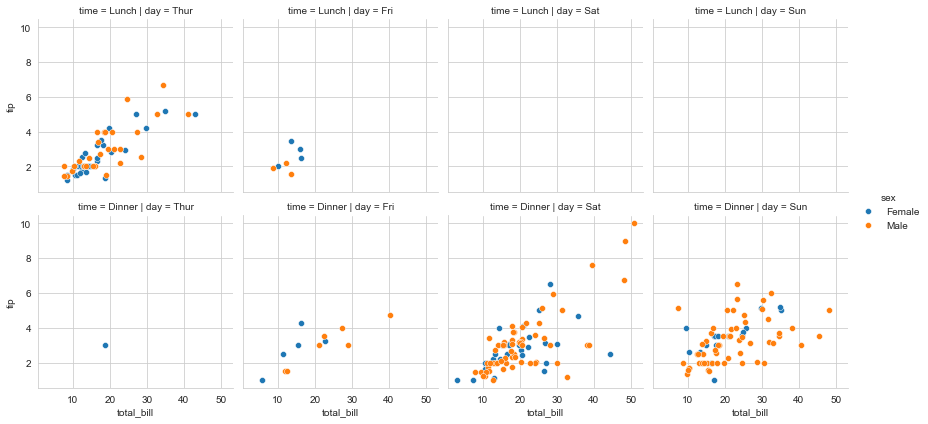

In [93]:
g=sns.FacetGrid(tips, row="time", col="day", hue="sex", 
                row_order=['Lunch','Dinner'], 
                col_order=['Thur','Fri','Sat','Sun'])
g.map(sns.scatterplot, "total_bill", "tip")
g.add_legend();

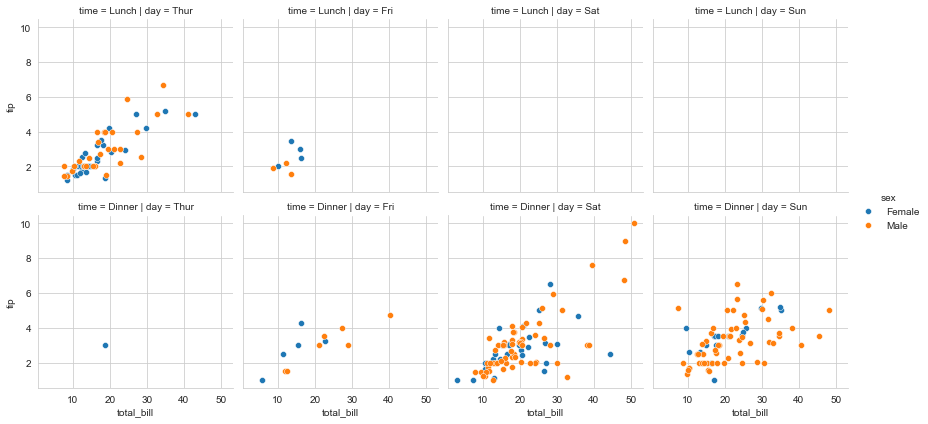

In [80]:
g=sns.FacetGrid(tips, row="time", col="day", hue="sex", 
                row_order=['Lunch','Dinner'], 
                col_order=['Thur','Fri','Sat','Sun'])
g.map(sns.scatterplot, "total_bill", "tip")  # Note that plot type here is a scatterplot()
g.add_legend();

 ----------
### CHALLENGE
1. The FacetGrid() rows display `time` values (Lunch or Dinner). We want to display them with Lunch in the first row and Dinner in the second. To specify the row order, use the `row_order` parameter, passing the correct sequence  like this: `row_order=['Lunch','Dinner']`. Edit FacetGrid() to use this parameter. 
2. We also want to specify the column order so that the sequence of days is from `Thur` to `Sun`. Using the parameter `col_order=['','']`, how would you specify the correct sequence of days for FacetGrid()?    

---
# jointplot( )

The jointplot() is a versatile graph that allows you to display more information on a 2-dimensional plane. 

The main graph is a scatterplot but above it you will see two bell curves:

1. The top plot shows KDE for the distribution of data points on the x-axis. Here, it's Total Bill.  
2. The right bell curve is rotated 90 degrees, showing the KDE for data points on the y-axis, or Tip Amount.  

Run the code below and try the experiments in the CHALLENGE. 

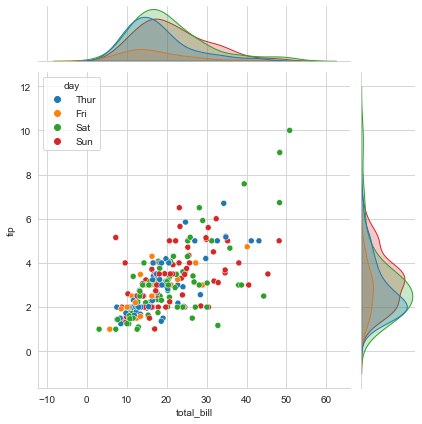

In [99]:
tips = sns.load_dataset("tips")
sns.jointplot(data=tips, x="total_bill", y="tip", hue="day");

----------
### CHALLENGE
1. Tweak the code above to make the color represent the number of guests per table.
2. Make the color represent sex.
3. Remove the color and see what happens to the jointplot().
----------

## jointplot( ) using `kind="hex"`

Changing the jointplot() type to `hex` allows you to display clustering via deepening shades of color. 
In the graph below, the darker hexes show more clustering at the lower left. This is validated by the bar graphs for both x- and y- values. 

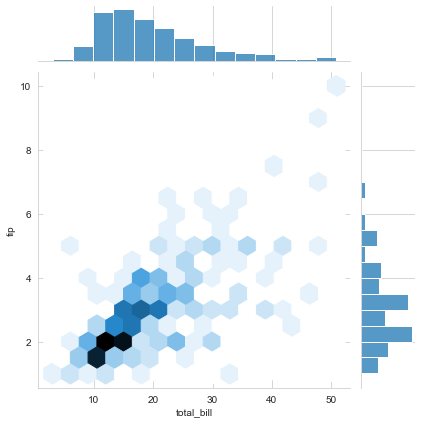

In [100]:
sns.jointplot(data=tips, x="total_bill", y="tip", kind="hex");

## jointplot( ) using `kind="kde"`
Remember the KDE algorithm used in Violin Plots? You can use them in jointplots too.  

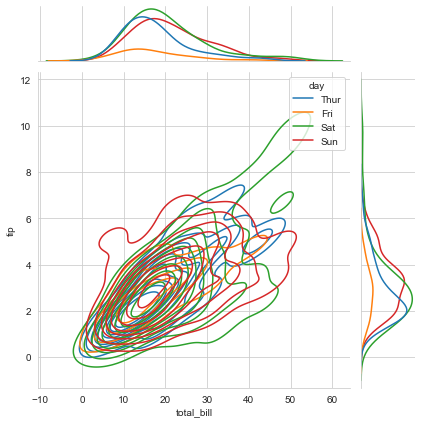

In [104]:
sns.jointplot(data=tips, x="total_bill", y="tip", hue="day", kind="kde");

----------
### CHALLENGE

1. Make the color represent the number of guests per table instead of the day.
2. Make the color represent sex.

---


# Forecasting via Regression

Up to now, we've only been discussing descriptive visualization. Visualization may also be used for forecasting. Forecasting means: "Let's analyze the historical data and use it to predict the outcome if we were given new input from a new dataset."
* Example 1: Given past sales data, what is the likelihood of earning more in Q3 next year?
* Example 2: Given these pictures are of cats, what is the likelihood that this new picture is of a cat?

For this course, we will try a method called simple linear regression.

Seaborn does regression through a couple of commands, one of which is `lmplot()`. The regression line represents a forecast of the value of the tip (y), given a specific value of `total_bill` or x. You only need one line of code to do the regression. See it in action, below.


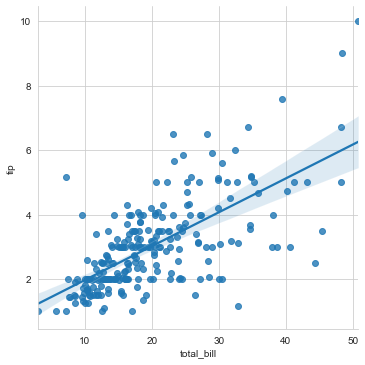

In [137]:
sns.lmplot(data=tips, x="total_bill", y="tip");

## Regression via jointplot( )
The other Seaborn command to show a regression is `jointplot()`, which can convey more information, visually. You've seen `jointplot()` at work. All you need to do is add the parameter `kind="reg"`. 

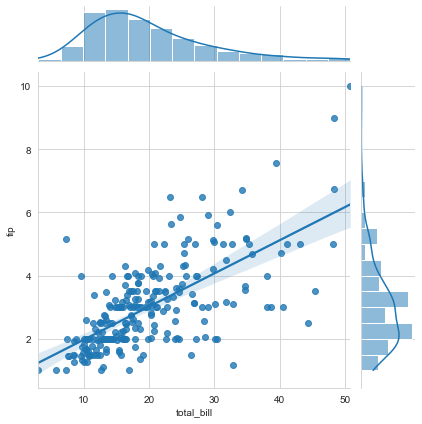

In [139]:
sns.jointplot(data=tips, x="total_bill", y="tip", kind="reg");